In [71]:
import xarray as xr
import ecmwflibs
from cfgrib.xarray_store import open_dataset
import numpy as np
import os
import pandas as pd

In [113]:
from typing import List
txt = str("filter_by_keys={'typeOfLevel': 'meanSea'}\n    filter_by_keys={'typeOfLevel': 'hybrid'}\n    filter_by_keys={'typeOfLevel': 'atmosphere'}\n    filter_by_keys={'typeOfLevel': 'surface'}\n    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}\n    filter_by_keys={'typeOfLevel': 'isobaricInPa'}\n    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGround'}\n    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}\n    filter_by_keys={'typeOfLevel': 'heightAboveSea'}\n    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}\n    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'highCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'cloudCeiling'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'tropopause'}\n    filter_by_keys={'typeOfLevel': 'maxWind'}\n    filter_by_keys={'typeOfLevel': 'isothermZero'}\n    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}\n    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'sigmaLayer'}\n    filter_by_keys={'typeOfLevel': 'sigma'}\n    filter_by_keys={'typeOfLevel': 'potentialVorticity'}")

def cls_txt(det: str):

    

    det = det.lower()
    det = det.replace("=", "")
    det = det.replace("{", "")
    det = det.replace("}", "")
    det = det.replace("\n", "")
    det = det.replace(":", "")
    det = det.replace("'", "")
    det = det.replace("  ", " ")
    det = det.replace("filter_by_keys", "")
    det = det.replace("typeoflevel", "")
    det = det.replace("  ", "")
    det = det.lstrip()
    det = det.rstrip()
    det = det
    
    det = det.replace(" ", ", ")
    return det

txt2 = cls_txt(txt)
txt2

'meansea, hybrid, atmosphere, surface, planetaryboundarylayer, isobaricinpa, isobaricinhpa, heightaboveground, depthbelowlandlayer, heightabovesea, atmospheresinglelayer, lowcloudlayer, middlecloudlayer, highcloudlayer, cloudceiling, heightabovegroundlayer, tropopause, maxwind, isothermzero, highesttroposphericfreezing, pressurefromgroundlayer, sigmalayer, sigma, potentialvorticity'

In [143]:
perams = []
txt3 = txt2.split(',')  # Split txt2 outside the loop
for n in range(len(txt3)):
    txt3[n] = txt3[n].lstrip()  # Corrected: Assign back the stripped string
    perams.append(txt3[n])  # Corrected: Append the stripped string to perams

perams.remove('hybrid')
perams

['meansea',
 'atmosphere',
 'surface',
 'planetaryboundarylayer',
 'isobaricinpa',
 'isobaricinhpa',
 'heightaboveground',
 'depthbelowlandlayer',
 'heightabovesea',
 'atmospheresinglelayer',
 'lowcloudlayer',
 'middlecloudlayer',
 'highcloudlayer',
 'cloudceiling',
 'heightabovegroundlayer',
 'tropopause',
 'maxwind',
 'isothermzero',
 'highesttroposphericfreezing',
 'pressurefromgroundlayer',
 'sigmalayer',
 'sigma',
 'potentialvorticity']

In [163]:
len(perams)

23

In [165]:
grib_file = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS\gfs_4_20231017_0000_000.grb2"

# Open the GRIB2 file using xarray
# ds = xr.open_dataset(grib_file, engine='cfgrib')

ini_ds = open_dataset(grib_file, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': perams[13]}}, decode_cf=True)
ini_ds
# ds

Ignoring index file 'C:\\Projs\\COde\\Earthquake\\earthquake-prediction\\data\\GFS\\gfs_4_20231017_0000_000.grb2.9093e.idx' incompatible with GRIB file


<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    Conventions:  CF-1.7
    history:      2024-04-18T14:26 GRIB to CDM+CF via cfgrib-0.9.11.0/ecCodes...

In [166]:
ini_ds.data_vars

Data variables:
    *empty*

In [91]:
ini_ds['tcc'].values

NameError: name 'ini_ds' is not defined

In [56]:
latt = 22.71
lonn = 77.41

bpl_data = ini_ds.sel(latitude=latt, longitude=lonn, method='nearest')

In [63]:
bpl_data.variables

Frozen({'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time, 'step': <xarray.Variable ()> Size: 8B
[1 values with dtype=timedelta64[ns]]
Attributes:
    long_name:      time since forecast_reference_time
    standard_name:  forecast_period, 'atmosphere': <xarray.Variable ()> Size: 8B
[1 values with dtype=float64]
Attributes:
    long_name:  original GRIB coordinate for key: level(atmosphere)
    units:      1, 'latitude': <xarray.Variable ()> Size: 8B
array(22.5)
Attributes:
    units:             degrees_north
    standard_name:     latitude
    long_name:         latitude
    stored_direction:  decreasing, 'longitude': <xarray.Variable ()> Size: 8B
array(77.5)
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude, 'valid_time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]]
Attributes:
    st

In [60]:
list(bpl_data.data_vars)

['refc', 'tcc']

In [14]:
reflek = float(bpl_data['refc'].values)
total_cc = float(bpl_data['tcc'].values)
print(reflek, total_cc)


-20.000003814697266 1.100000023841858


---

# Using IMD Dataset (Legacy)

In [53]:
# Using IMDLIB #

import imdlib as imd

In [54]:
start_yr = 2022
end_yr = 2023
variable = 'rain' # other options are ('tmin'/ 'tmax')
data = imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')

Downloading: rain for year 2022
Downloading: rain for year 2023


KeyboardInterrupt: 

In [56]:
start_yr = 2022
end_yr = 2023
variable = 'rain' # other options are ('tmin'/ 'tmax')
file_dir = 'C:/Projs/COde/Earthquake/earthquake-prediction/rain' #Path to save the files
data = imd.open_data(variable, start_yr, end_yr,'yearwise', file_dir)
data

In [57]:
ds = data.get_xarray()
ds

<xarray.Dataset> Size: 102MB
Dimensions:  (time: 730, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 6kB 2022-01-01 2022-01-02 ... 2023-12-31
Data variables:
    rain     (time, lat, lon) float64 102MB -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-04-15 08:25:17.480599 Python
    references:   
    comment:      
    crs:          epsg:4326

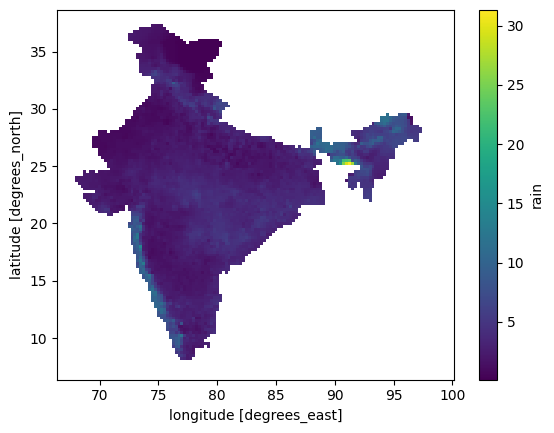

In [58]:
ds = ds.where(ds['rain'] != -999.) #Remove NaN values
ds['rain'].mean('time').plot()

In [76]:
df = ds.to_dataframe()
df

rain
time       lat  lon         
2022-01-01 6.5  66.50    NaN
                66.75    NaN
                67.00    NaN
                67.25    NaN
                67.50    NaN
...                      ...
2023-12-31 38.5 99.00    NaN
                99.25    NaN
                99.50    NaN
                99.75    NaN
                100.00   NaN

[12712950 rows x 1 columns]

In [77]:
df.rain.unique()

array([       nan, 0.        , 5.0996213 , ..., 0.02632885, 0.39881554,
       0.21188194])

In [78]:
df['rain'] = df['rain'].map({np.nan: 0}) 

In [79]:
df

rain
time       lat  lon         
2022-01-01 6.5  66.50    0.0
                66.75    0.0
                67.00    0.0
                67.25    0.0
                67.50    0.0
...                      ...
2023-12-31 38.5 99.00    0.0
                99.25    0.0
                99.50    0.0
                99.75    0.0
                100.00   0.0

[12712950 rows x 1 columns]

In [ ]:
new_df = df.loc['']

In [80]:
df.index

MultiIndex([('2022-01-01',  6.5,  66.5),
            ('2022-01-01',  6.5, 66.75),
            ('2022-01-01',  6.5,  67.0),
            ('2022-01-01',  6.5, 67.25),
            ('2022-01-01',  6.5,  67.5),
            ('2022-01-01',  6.5, 67.75),
            ('2022-01-01',  6.5,  68.0),
            ('2022-01-01',  6.5, 68.25),
            ('2022-01-01',  6.5,  68.5),
            ('2022-01-01',  6.5, 68.75),
            ...
            ('2023-12-31', 38.5, 97.75),
            ('2023-12-31', 38.5,  98.0),
            ('2023-12-31', 38.5, 98.25),
            ('2023-12-31', 38.5,  98.5),
            ('2023-12-31', 38.5, 98.75),
            ('2023-12-31', 38.5,  99.0),
            ('2023-12-31', 38.5, 99.25),
            ('2023-12-31', 38.5,  99.5),
            ('2023-12-31', 38.5, 99.75),
            ('2023-12-31', 38.5, 100.0)],
           names=['time', 'lat', 'lon'], length=12712950)

In [81]:
df = df.reset_index()

In [83]:
df

,time,lat,lon,rain
0,2022-01-01,6.5,66.50,0.0
1,2022-01-01,6.5,66.75,0.0
2,2022-01-01,6.5,67.00,0.0
3,2022-01-01,6.5,67.25,0.0
4,2022-01-01,6.5,67.50,0.0
...,...,...,...,...
12712945,2023-12-31,38.5,99.00,0.0
12712946,2023-12-31,38.5,99.25,0.0
12712947,2023-12-31,38.5,99.50,0.0
12712948,2023-12-31,38.5,99.75,0.0


In [ ]:
new_df = [(df.loc['lat'] == 22.77)]

---

# Multivariate TimeSeries Forescating

In [1]:
dat_path = r'C:\Users\Rishi\Dropbox\final_dataa.csv'

In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
df = pd.read_csv(dat_path)
df.head(10)

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,Location,lightning,year,month,day,hour
0,13.08,10.81,11.95,8.06,85.94,0.26,100.34,1.86,37.50,4.19,36.81,Santravi_labelled,0,2001,1,1,0
1,13.03,10.83,11.94,8.06,86.38,0.13,100.27,2.04,56.55,4.36,55.37,Santravi_labelled,0,2001,1,1,1
2,12.88,10.88,11.88,8.12,87.44,0.12,100.22,1.69,76.35,3.52,75.47,Santravi_labelled,0,2001,1,1,2
3,12.81,10.96,11.89,8.18,88.31,0.09,100.25,0.79,119.11,1.66,118.14,Santravi_labelled,0,2001,1,1,3
4,12.62,10.98,11.80,8.18,89.50,0.02,100.31,0.77,191.08,1.38,190.80,Santravi_labelled,0,2001,1,1,4
5,12.01,11.65,11.83,8.54,97.50,0.06,100.24,1.45,109.51,2.33,109.16,Santravi_labelled,0,2001,1,1,5
6,12.96,12.33,12.65,8.91,95.81,0.22,100.41,3.01,173.15,4.61,172.80,Santravi_labelled,0,2001,1,1,6
7,14.12,12.69,13.40,9.09,90.88,0.95,100.44,3.64,164.71,4.32,165.01,Santravi_labelled,0,2001,1,1,7
8,16.87,12.26,14.57,8.85,74.19,0.01,100.45,3.21,158.12,3.78,156.88,Santravi_labelled,0,2001,1,1,8
9,19.56,10.66,15.12,8.00,56.31,0.03,100.49,3.05,161.19,3.54,160.29,Santravi_labelled,0,2001,1,1,9


In [4]:
df['Location'].unique()

array(['Santravi_labelled', 'Mahoba_labelled', 'Fatehpur_labelled',
       'Sonbhadra_labelled', 'Banda_labelled', 'Prayagraj_labelled',
       'Chandauli_labelled', 'Chitrakoot_labelled', 'Varanasi_labelled',
       'Jhansi_labelled', 'Mirzapur_labelled', 'Kausambi_labelled'],
      dtype=object)

In [5]:
df1 = df.loc[df['Location'] == 'Jhansi_labelled']
df1

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,Location,lightning,year,month,day,hour
1130328,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,Jhansi_labelled,0,2001,1,1,0
1130329,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,Jhansi_labelled,0,2001,1,1,1
1130330,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,Jhansi_labelled,0,2001,1,1,2
1130331,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,Jhansi_labelled,0,2001,1,1,3
1130332,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,Jhansi_labelled,0,2001,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255915,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,Jhansi_labelled,0,2015,4,30,19
1255916,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,Jhansi_labelled,0,2015,4,30,20
1255917,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,Jhansi_labelled,0,2015,4,30,21
1255918,31.29,9.98,20.63,7.81,26.81,0.00,97.86,2.82,138.93,4.94,138.21,Jhansi_labelled,0,2015,4,30,22


## Data Mainpulation

In [6]:
df1['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df1

C:\Users\Rishi\AppData\Local\Temp\ipykernel_15000\431174959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])


,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,Location,lightning,year,month,day,hour,timestamp
1130328,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,Jhansi_labelled,0,2001,1,1,0,2001-01-01 00:00:00
1130329,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,Jhansi_labelled,0,2001,1,1,1,2001-01-01 01:00:00
1130330,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,Jhansi_labelled,0,2001,1,1,2,2001-01-01 02:00:00
1130331,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,Jhansi_labelled,0,2001,1,1,3,2001-01-01 03:00:00
1130332,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,Jhansi_labelled,0,2001,1,1,4,2001-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255915,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,Jhansi_labelled,0,2015,4,30,19,2015-04-30 19:00:00
1255916,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,Jhansi_labelled,0,2015,4,30,20,2015-04-30 20:00:00
1255917,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,Jhansi_labelled,0,2015,4,30,21,2015-04-30 21:00:00
1255918,31.29,9.98,20.63,7.81,26.81,0.00,97.86,2.82,138.93,4.94,138.21,Jhansi_labelled,0,2015,4,30,22,2015-04-30 22:00:00


In [7]:
df1 = df1.set_index(['timestamp'])
df1

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,Location,lightning,year,month,day,hour
timestamp,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,Jhansi_labelled,0,2001,1,1,0
2001-01-01 01:00:00,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,Jhansi_labelled,0,2001,1,1,1
2001-01-01 02:00:00,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,Jhansi_labelled,0,2001,1,1,2
2001-01-01 03:00:00,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,Jhansi_labelled,0,2001,1,1,3
2001-01-01 04:00:00,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,Jhansi_labelled,0,2001,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-30 19:00:00,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,Jhansi_labelled,0,2015,4,30,19
2015-04-30 20:00:00,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,Jhansi_labelled,0,2015,4,30,20
2015-04-30 21:00:00,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,Jhansi_labelled,0,2015,4,30,21


In [8]:
df1['seconds'] = df1.index.map(pd.Timestamp.timestamp)
df1

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,Location,lightning,year,month,day,hour,seconds
timestamp,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,Jhansi_labelled,0,2001,1,1,0,9.783072e+08
2001-01-01 01:00:00,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,Jhansi_labelled,0,2001,1,1,1,9.783108e+08
2001-01-01 02:00:00,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,Jhansi_labelled,0,2001,1,1,2,9.783144e+08
2001-01-01 03:00:00,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,Jhansi_labelled,0,2001,1,1,3,9.783180e+08
2001-01-01 04:00:00,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,Jhansi_labelled,0,2001,1,1,4,9.783216e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-30 19:00:00,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,Jhansi_labelled,0,2015,4,30,19,1.430420e+09
2015-04-30 20:00:00,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,Jhansi_labelled,0,2015,4,30,20,1.430424e+09
2015-04-30 21:00:00,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,Jhansi_labelled,0,2015,4,30,21,1.430428e+09


In [9]:
day = 24*60*60
year = (365.2425)*day

df1['Day_sin'] = np.sin(df1['seconds'] * (2 * np.pi / day))
df1['Day_cos'] = np.cos(df1['seconds'] * (2 * np.pi / day))
df1['Year_sin'] = np.sin(df1['seconds'] * (2 * np.pi / year))
df1['Year_cos'] = np.cos(df1['seconds'] * (2 * np.pi / year))

In [10]:
df1

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,...,lightning,year,month,day,hour,seconds,Day_sin,Day_cos,Year_sin,Year_cos
timestamp,,,,,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,...,0,2001,1,1,0,9.783072e+08,-3.803622e-12,1.000000,0.008300,0.999966
2001-01-01 01:00:00,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,...,0,2001,1,1,1,9.783108e+08,2.588190e-01,0.965926,0.009017,0.999959
2001-01-01 02:00:00,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,...,0,2001,1,1,2,9.783144e+08,5.000000e-01,0.866025,0.009734,0.999953
2001-01-01 03:00:00,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,...,0,2001,1,1,3,9.783180e+08,7.071068e-01,0.707107,0.010450,0.999945
2001-01-01 04:00:00,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,...,0,2001,1,1,4,9.783216e+08,8.660254e-01,0.500000,0.011167,0.999938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-30 19:00:00,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,...,0,2015,4,30,19,1.430420e+09,-9.659258e-01,0.258819,0.881646,-0.471912
2015-04-30 20:00:00,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,...,0,2015,4,30,20,1.430424e+09,-8.660254e-01,0.500000,0.881307,-0.472544
2015-04-30 21:00:00,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,...,0,2015,4,30,21,1.430428e+09,-7.071068e-01,0.707107,0.880968,-0.473175


In [11]:
df2 = df1.drop(columns=['year', 'month', 'day', 'hour', 'seconds'], axis=1)
df2 

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,Location,lightning,Day_sin,Day_cos,Year_sin,Year_cos
timestamp,,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,Jhansi_labelled,0,-3.803622e-12,1.000000,0.008300,0.999966
2001-01-01 01:00:00,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,Jhansi_labelled,0,2.588190e-01,0.965926,0.009017,0.999959
2001-01-01 02:00:00,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,Jhansi_labelled,0,5.000000e-01,0.866025,0.009734,0.999953
2001-01-01 03:00:00,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,Jhansi_labelled,0,7.071068e-01,0.707107,0.010450,0.999945
2001-01-01 04:00:00,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,Jhansi_labelled,0,8.660254e-01,0.500000,0.011167,0.999938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-30 19:00:00,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,Jhansi_labelled,0,-9.659258e-01,0.258819,0.881646,-0.471912
2015-04-30 20:00:00,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,Jhansi_labelled,0,-8.660254e-01,0.500000,0.881307,-0.472544
2015-04-30 21:00:00,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,Jhansi_labelled,0,-7.071068e-01,0.707107,0.880968,-0.473175


In [12]:
df2.drop(columns=['Location'], inplace=True)
df2

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,lightning,Day_sin,Day_cos,Year_sin,Year_cos
timestamp,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,0,-3.803622e-12,1.000000,0.008300,0.999966
2001-01-01 01:00:00,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,0,2.588190e-01,0.965926,0.009017,0.999959
2001-01-01 02:00:00,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,0,5.000000e-01,0.866025,0.009734,0.999953
2001-01-01 03:00:00,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,0,7.071068e-01,0.707107,0.010450,0.999945
2001-01-01 04:00:00,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,0,8.660254e-01,0.500000,0.011167,0.999938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-30 19:00:00,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,0,-9.659258e-01,0.258819,0.881646,-0.471912
2015-04-30 20:00:00,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,0,-8.660254e-01,0.500000,0.881307,-0.472544
2015-04-30 21:00:00,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,0,-7.071068e-01,0.707107,0.880968,-0.473175


In [13]:
def window_make2(df, window_size=17):
  df_as_np = df.to_numpy()

  X=[]
  y=[]

  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i : i + window_size]]
    X.append(row)

    label = [df_as_np[i + window_size][0],
             df_as_np[i + window_size][1],
             df_as_np[i + window_size][2],
             df_as_np[i + window_size][3],
             df_as_np[i + window_size][4]]
    y.append(label)

  return np.array(X), np.array(y)

In [294]:
dddf.index()
# d3df = dddf.drop(columns=['h_angle', 'weather', 'app_temp', 'timestamp_local', 'azimuth', 'datetime', 'revision_status', 'index', 'ts', 'weather'])
# d3df

TypeError: 'RangeIndex' object is not callable

In [14]:
X1, y1 = window_make2(df2)
X1.shape, y1.shape

((125575, 17, 16), (125575, 5))

In [15]:
# Splitting the Dataset

X1_train, y1_train = X1[:100000], y1[:100000]
X1_val, y1_val = X1[100000:120000], y1[100000:120000]
X1_test, y1_test = X1[120000:], y1[120000:]

print(f"Training Set: {X1_train.shape, y1_train.shape} \nValdiation Set: {X1_val.shape, y1_val.shape} \nTest Set: {X1_test.shape, y1_test.shape}")

Training Set: ((100000, 17, 16), (100000, 5)) 
Valdiation Set: ((20000, 17, 16), (20000, 5)) 
Test Set: ((5575, 17, 16), (5575, 5))


In [16]:
X1_train

array([[[ 1.41300000e+01,  8.32000000e+00,  1.12300000e+01, ...,
          1.00000000e+00,  8.30024463e-03,  9.99965552e-01],
        [ 1.35200000e+01,  8.75000000e+00,  1.11400000e+01, ...,
          9.65925826e-01,  9.01700012e-03,  9.99959346e-01],
        [ 1.32600000e+01,  9.22000000e+00,  1.12400000e+01, ...,
          8.66025404e-01,  9.73375098e-03,  9.99952626e-01],
        ...,
        [ 2.17700000e+01,  8.77000000e+00,  1.52700000e+01, ...,
         -8.66025404e-01,  1.83342659e-02,  9.99831913e-01],
        [ 2.14600000e+01,  8.27000000e+00,  1.48700000e+01, ...,
         -7.07106781e-01,  1.90509230e-02,  9.99818515e-01],
        [ 1.94400000e+01,  7.94000000e+00,  1.36900000e+01, ...,
         -5.00000000e-01,  1.97675704e-02,  9.99804602e-01]],

       [[ 1.35200000e+01,  8.75000000e+00,  1.11400000e+01, ...,
          9.65925826e-01,  9.01700012e-03,  9.99959346e-01],
        [ 1.32600000e+01,  9.22000000e+00,  1.12400000e+01, ...,
          8.66025404e-01,  9.73375098e

In [17]:
def std_fn(data, idx):
  mean = np.mean(data[:, :, idx])
  std = np.std(data[:, :, idx])
  return mean, std

def preprocess3(X, y, idx):
  X[:, :, idx] = (X[:, :, idx] - std_fn(X, idx)[0]) / std_fn(X, idx)[1]
  y[:, idx] = (y[:, idx] - std_fn(X, idx)[0]) / std_fn(X, idx)[1]
  return X, y

In [18]:
for i in range(0,5):
  preprocess3(X1_train, y1_train, i)
  print("Training set done\n")

  preprocess3(X1_val, y1_val, i)
  print("Validation set done\n")

  preprocess3(X1_test, y1_test, i)
  print("Testing set done")

Training set done

Validation set done

Testing set done
Training set done

Validation set done

Testing set done
Training set done

Validation set done

Testing set done
Training set done

Validation set done

Testing set done
Training set done

Validation set done

Testing set done


In [19]:
model2 = Sequential([
    layers.InputLayer((10,16)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(5, activation='linear'),
])

model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,429 (91.52 KB)

 Trainable params: 23,429 (91.52 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow import keras
from tensorflow.keras import callbacks

# Specifying filename without extension
filepath = r"C:\Projs\COde\Meteo\MetP\model\best.keras"

cp = callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

losses = keras.losses.MeanSquaredError()
metric = keras.metrics.RootMeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=1e-4)

model2.compile(loss=losses, optimizer=opt, metrics=[metric])

In [21]:
model2.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=15, callbacks=[cp])

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 484.3874 - root_mean_squared_error: 21.5436 - val_loss: 74.4828 - val_root_mean_squared_error: 8.6303
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 40.0934 - root_mean_squared_error: 6.2898 - val_loss: 22.9328 - val_root_mean_squared_error: 4.7888
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 6.2258 - root_mean_squared_error: 2.4928 - val_loss: 21.5047 - val_root_mean_squared_error: 4.6373
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 3.7361 - root_mean_squared_error: 1.9322 - val_loss: 19.2734 - val_root_mean_squared_error: 4.3902
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.7763 - root_mean_squared_error: 1.6653 - val_loss: 20.9725 - val_root_mean_squared_error: 4.5796
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 2.1456 - root_mean_squared_error: 1.4647 - val_loss: 19.4375 - val_root_mean_squared_error: 4.4088
Epoch 7/15
3125/3125 ━━━

In [22]:
df2

,T2M,T2MDEW,T2MWET,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,lightning,Day_sin,Day_cos,Year_sin,Year_cos
timestamp,,,,,,,,,,,,,,,,
2001-01-01 00:00:00,14.13,8.32,11.23,6.96,68.00,0.01,98.65,2.28,117.53,4.89,118.45,0,-3.803622e-12,1.000000,0.008300,0.999966
2001-01-01 01:00:00,13.52,8.75,11.14,7.14,72.88,0.01,98.61,2.43,125.84,5.06,126.22,0,2.588190e-01,0.965926,0.009017,0.999959
2001-01-01 02:00:00,13.26,9.22,11.24,7.39,76.38,0.01,98.59,2.97,133.61,5.39,133.41,0,5.000000e-01,0.866025,0.009734,0.999953
2001-01-01 03:00:00,12.96,9.58,11.27,7.57,79.81,0.01,98.57,3.47,137.92,5.72,137.77,0,7.071068e-01,0.707107,0.010450,0.999945
2001-01-01 04:00:00,12.75,9.87,11.30,7.69,82.50,0.01,98.59,3.69,143.35,5.96,143.21,0,8.660254e-01,0.500000,0.011167,0.999938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-30 19:00:00,35.84,10.27,23.05,8.00,21.25,0.00,97.82,1.77,100.91,2.75,101.82,0,-9.659258e-01,0.258819,0.881646,-0.471912
2015-04-30 20:00:00,34.22,10.28,22.25,8.00,23.25,0.00,97.86,2.22,110.79,3.65,111.57,0,-8.660254e-01,0.500000,0.881307,-0.472544
2015-04-30 21:00:00,32.69,10.17,21.43,7.93,25.06,0.00,97.87,2.58,123.50,4.40,123.49,0,-7.071068e-01,0.707107,0.880968,-0.473175


In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X1_test)
  
  hum_preds, pres_preds, cldcov_preds, winsp_preds, temp_preds = predictions[:, 0], predictions[:, 1], predictions[:, 2], predictions[:, 3], predictions[:, 4]
  hum_actuals, pres_actuals, cldcov_actuals, winsp_actuals, temp_actuals = y[:, 0], y[:, 1], y[:, 2], y[:, 3], y[:, 4]
  multi_preds = pd.DataFrame(data={'Temperature Predictions': temp_preds, 'Temperature Actuals':temp_actuals,
                                  'Pressure Predictions': pres_preds, 'Pressure Actuals': pres_actuals,
                                  'Humidity Predictions': hum_preds, 'Humidity Actuals': hum_actuals,
                                  'CloudCoverage Predictions': cldcov_preds, 'CloudCoverage Actuals': cldcov_actuals,
                                  'WindSpeed Predictions': winsp_preds, 'WindSpeed Actuals': winsp_actuals,
                                  })

  fig = plt.subplots(figsize=(15,15))

  plt.plot(multi_preds['Temperature Predictions'][start:end], label='Temp Predictions')
  plt.plot(multi_preds['Temperature Actuals'][start:end], label='Temp Actuals')
  plt.plot(multi_preds['Pressure Predictions'][start:end], label='Pres Predictions')
  plt.plot(multi_preds['Pressure Actuals'][start:end], label='Pres Actuals')
  plt.plot(multi_preds['Humidity Predictions'][start:end], label='Hum Predictions')
  plt.plot(multi_preds['Humidity Actuals'][start:end], label='Hum Actuals')
  plt.plot(multi_preds['CloudCoverage Predictions'][start:end], label='Cld Cov Predictions')
  plt.plot(multi_preds['CloudCoverage Actuals'][start:end], label='Cld Cov Actuals')
  plt.plot(multi_preds['WindSpeed Predictions'][start:end], label='Wind Spd Predictions')
  plt.plot(multi_preds['WindSpeed Actuals'][start:end], label='Wind Sod Actuals')
  plt.legend(multi_preds.columns)

  return multi_preds[start:end]

In [262]:
import requests
import csv
import json

# The API endpoint you want to call
url = 'https://api.weatherbit.io/v2.0/history/hourly?lat=23.25&lon=77.25&country=India&start_date=2024-01-01&end_date=2024-04-01&key=fcac888d541149bcabe62e93c304cd29'

# Make the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the response JSON into a Python dictionary
    data = response.json()
    # Do something with the data
    dat = data['data']
    
else:
    print(f'Failed to retrieve data: {response.status_code}')



In [264]:
dat

[{'app_temp': 14.8,
  'azimuth': 107.1,
  'clouds': 25,
  'datetime': '2024-01-01:00',
  'dewpt': 14,
  'dhi': 0,
  'dni': 0,
  'elev_angle': -20.6,
  'ghi': 0,
  'h_angle': None,
  'pod': 'n',
  'precip': 0,
  'pres': 955,
  'revision_status': 'final',
  'rh': 95,
  'slp': 1016,
  'snow': 0,
  'solar_rad': 0,
  'temp': 14.8,
  'timestamp_local': '2024-01-01T05:30:00',
  'timestamp_utc': '2024-01-01T00:00:00',
  'ts': 1704067200,
  'uv': 0,
  'vis': 1,
  'weather': {'icon': 'a03n', 'description': 'Haze', 'code': 721},
  'wind_dir': 70,
  'wind_gust_spd': 3.5,
  'wind_spd': 1},
 {'app_temp': 12.3,
  'azimuth': 111.9,
  'clouds': 25,
  'datetime': '2024-01-01:01',
  'dewpt': 12,
  'dhi': 0,
  'dni': 0,
  'elev_angle': -7.6,
  'ghi': 0,
  'h_angle': None,
  'pod': 'n',
  'precip': 0,
  'pres': 956,
  'revision_status': 'final',
  'rh': 98,
  'slp': 1016,
  'snow': 0,
  'solar_rad': 0,
  'temp': 12.3,
  'timestamp_local': '2024-01-01T06:30:00',
  'timestamp_utc': '2024-01-01T01:00:00',
  '

In [41]:
import json

# Open the JSON file in read mode
with open('data.json', 'r') as file:
    
    # Parse the JSON data
    data = json.load(file)

    # Convert the list of dictionaries to a dictionary with the datetime value as the key
    result = {item['datetime']: item for item in data}

    # Print the resulting dictionary
    print(result)


{'2023-04-17': {'clouds': 20, 'datetime': '2023-04-17', 'dewpt': 11.9, 'dhi': 51, 'dni': 408, 'ghi': 330, 'max_dhi': 126, 'max_dni': 955, 'max_ghi': 1048, 'max_temp': 40, 'max_temp_ts': 1681722000, 'max_uv': 11.6, 'max_wind_dir': 277, 'max_wind_spd': 3.2, 'max_wind_spd_ts': 1681729200, 'min_temp': 25.9, 'min_temp_ts': 1681689600, 'precip': 0, 'precip_gpm': 0, 'pres': 959, 'revision_status': 'final', 'rh': 30, 'slp': 1009, 'snow': 0, 'snow_depth': None, 'solar_rad': 329, 't_dhi': 1220, 't_dni': 9793, 't_ghi': 7931, 't_solar_rad': 7904, 'temp': 32.3, 'ts': 1681669800, 'wind_dir': 277, 'wind_gust_spd': 8.8, 'wind_spd': 2.7}, '2023-04-18': {'clouds': 21, 'datetime': '2023-04-18', 'dewpt': 11.2, 'dhi': 51, 'dni': 409, 'ghi': 331, 'max_dhi': 126, 'max_dni': 955, 'max_ghi': 1049, 'max_temp': 40, 'max_temp_ts': 1681812000, 'max_uv': 10.8, 'max_wind_dir': 298, 'max_wind_spd': 3.2, 'max_wind_spd_ts': 1681790400, 'min_temp': 24.4, 'min_temp_ts': 1681772400, 'precip': 0, 'precip_gpm': 0, 'pres': 9

In [242]:
import pandas as pd

# Create an empty list to store DataFrames from each dictionary
data_frames = []

# Create a DataFrame from each dictionary
for dicts in data:
    data_frame = pd.DataFrame([dicts])  # Wrap data in a list for DataFrame creation
    data_frames.append(data_frame)

# Concatenate the DataFrames vertically (axis=0)
df = pd.concat(data_frames, ignore_index=True)

df

,clouds,datetime,dewpt,dhi,dni,ghi,max_dhi,max_dni,max_ghi,max_temp,...,solar_rad,t_dhi,t_dni,t_ghi,t_solar_rad,temp,ts,wind_dir,wind_gust_spd,wind_spd
0,20,2023-04-17,11.9,51,408,330,126,955,1048,40.0,...,329,1220,9793,7931,7904,32.3,1681669800,277,8.8,2.7
1,21,2023-04-18,11.2,51,409,331,126,955,1049,40.0,...,324,1222,9809,7951,7767,32.6,1681756200,298,7.2,2.6
2,64,2023-04-19,12.5,51,409,332,126,954,1050,39.3,...,280,1224,9825,7971,6722,32.8,1681842600,285,10.8,3.5
3,36,2023-04-20,13.6,51,410,333,126,954,1051,37.8,...,317,1226,9840,7990,7616,30.7,1681929000,247,11.2,3.0
4,22,2023-04-21,14.3,51,411,334,126,954,1052,35.9,...,327,1227,9855,8008,7843,29.5,1682015400,229,10.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,38,2024-04-13,19.1,50,405,327,126,956,1044,33.3,...,293,1211,9723,7846,7039,27.0,1712946600,164,8.8,2.5
363,28,2024-04-14,19.9,51,406,328,126,955,1045,35.9,...,326,1213,9741,7868,7820,28.5,1713033000,190,7.6,2.1
364,40,2024-04-15,19.1,51,407,329,126,955,1046,37.4,...,283,1216,9759,7890,6797,30.2,1713119400,163,8.4,0.9
365,16,2024-04-16,15.8,51,407,330,126,955,1047,38.1,...,330,1218,9776,7911,7911,31.1,1713205800,309,8.4,2.0


In [278]:
data_frames = []

for ds in dat:
    data_frame = pd.DataFrame([ds])
    data_frames.append(data_frame)

hrs_df = pd.concat(data_frames, ignore_index=True)
hrs_df

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,14.8,107.1,25,2024-01-01:00,14.0,0,0,-20.6,0,None,...,14.8,2024-01-01T05:30:00,2024-01-01T00:00:00,1704067200,0.0,1,"{'icon': 'a03n', 'description': 'Haze', 'code'...",70,3.5,1.00
1,12.3,111.9,25,2024-01-01:01,12.0,0,0,-7.6,0,None,...,12.3,2024-01-01T06:30:00,2024-01-01T01:00:00,1704070800,0.0,1,"{'icon': 'a05n', 'description': 'Fog', 'code':...",30,2.9,0.66
2,11.7,117.7,25,2024-01-01:02,11.7,35,308,4.9,52,None,...,11.7,2024-01-01T07:30:00,2024-01-01T02:00:00,1704074400,2.0,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",215,3.6,1.16
3,14.0,125.1,28,2024-01-01:03,12.6,72,651,16.7,252,None,...,14.0,2024-01-01T08:30:00,2024-01-01T03:00:00,1704078000,2.3,0,"{'icon': 'a03d', 'description': 'Haze', 'code'...",320,4.8,1.00
4,18.0,134.6,35,2024-01-01:04,18.0,92,790,27.3,448,None,...,18.0,2024-01-01T09:30:00,2024-01-01T04:00:00,1704081600,3.2,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,26.8,2.9,0,2024-03-31:19,5.0,0,0,-62.1,0,None,...,28.0,2024-04-01T00:30:00,2024-03-31T19:00:00,1711911600,0.0,16,"{'icon': 'c01n', 'description': 'Clear Sky', '...",250,4.8,3.10
2180,26.5,31.9,25,2024-03-31:20,3.3,0,0,-57.9,0,None,...,27.6,2024-04-01T01:30:00,2024-03-31T20:00:00,1711915200,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.5,3.42
2181,26.2,51.7,25,2024-03-31:21,2.9,0,0,-48.6,0,None,...,27.1,2024-04-01T02:30:00,2024-03-31T21:00:00,1711918800,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,11.2,4.00
2182,25.1,64.4,24,2024-03-31:22,1.3,0,0,-36.9,0,None,...,26.0,2024-04-01T03:30:00,2024-03-31T22:00:00,1711922400,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.3,3.75


In [280]:
hrs_df

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,14.8,107.1,25,2024-01-01:00,14.0,0,0,-20.6,0,None,...,14.8,2024-01-01T05:30:00,2024-01-01T00:00:00,1704067200,0.0,1,"{'icon': 'a03n', 'description': 'Haze', 'code'...",70,3.5,1.00
1,12.3,111.9,25,2024-01-01:01,12.0,0,0,-7.6,0,None,...,12.3,2024-01-01T06:30:00,2024-01-01T01:00:00,1704070800,0.0,1,"{'icon': 'a05n', 'description': 'Fog', 'code':...",30,2.9,0.66
2,11.7,117.7,25,2024-01-01:02,11.7,35,308,4.9,52,None,...,11.7,2024-01-01T07:30:00,2024-01-01T02:00:00,1704074400,2.0,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",215,3.6,1.16
3,14.0,125.1,28,2024-01-01:03,12.6,72,651,16.7,252,None,...,14.0,2024-01-01T08:30:00,2024-01-01T03:00:00,1704078000,2.3,0,"{'icon': 'a03d', 'description': 'Haze', 'code'...",320,4.8,1.00
4,18.0,134.6,35,2024-01-01:04,18.0,92,790,27.3,448,None,...,18.0,2024-01-01T09:30:00,2024-01-01T04:00:00,1704081600,3.2,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,26.8,2.9,0,2024-03-31:19,5.0,0,0,-62.1,0,None,...,28.0,2024-04-01T00:30:00,2024-03-31T19:00:00,1711911600,0.0,16,"{'icon': 'c01n', 'description': 'Clear Sky', '...",250,4.8,3.10
2180,26.5,31.9,25,2024-03-31:20,3.3,0,0,-57.9,0,None,...,27.6,2024-04-01T01:30:00,2024-03-31T20:00:00,1711915200,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.5,3.42
2181,26.2,51.7,25,2024-03-31:21,2.9,0,0,-48.6,0,None,...,27.1,2024-04-01T02:30:00,2024-03-31T21:00:00,1711918800,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,11.2,4.00
2182,25.1,64.4,24,2024-03-31:22,1.3,0,0,-36.9,0,None,...,26.0,2024-04-01T03:30:00,2024-03-31T22:00:00,1711922400,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.3,3.75


In [283]:
hrs_df['timestamp_utc'] = pd.to_datetime(hrs_df['timestamp_utc'])
hrs_df

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,14.8,107.1,25,2024-01-01:00,14.0,0,0,-20.6,0,None,...,14.8,2024-01-01T05:30:00,2024-01-01 00:00:00,1704067200,0.0,1,"{'icon': 'a03n', 'description': 'Haze', 'code'...",70,3.5,1.00
1,12.3,111.9,25,2024-01-01:01,12.0,0,0,-7.6,0,None,...,12.3,2024-01-01T06:30:00,2024-01-01 01:00:00,1704070800,0.0,1,"{'icon': 'a05n', 'description': 'Fog', 'code':...",30,2.9,0.66
2,11.7,117.7,25,2024-01-01:02,11.7,35,308,4.9,52,None,...,11.7,2024-01-01T07:30:00,2024-01-01 02:00:00,1704074400,2.0,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",215,3.6,1.16
3,14.0,125.1,28,2024-01-01:03,12.6,72,651,16.7,252,None,...,14.0,2024-01-01T08:30:00,2024-01-01 03:00:00,1704078000,2.3,0,"{'icon': 'a03d', 'description': 'Haze', 'code'...",320,4.8,1.00
4,18.0,134.6,35,2024-01-01:04,18.0,92,790,27.3,448,None,...,18.0,2024-01-01T09:30:00,2024-01-01 04:00:00,1704081600,3.2,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,26.8,2.9,0,2024-03-31:19,5.0,0,0,-62.1,0,None,...,28.0,2024-04-01T00:30:00,2024-03-31 19:00:00,1711911600,0.0,16,"{'icon': 'c01n', 'description': 'Clear Sky', '...",250,4.8,3.10
2180,26.5,31.9,25,2024-03-31:20,3.3,0,0,-57.9,0,None,...,27.6,2024-04-01T01:30:00,2024-03-31 20:00:00,1711915200,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.5,3.42
2181,26.2,51.7,25,2024-03-31:21,2.9,0,0,-48.6,0,None,...,27.1,2024-04-01T02:30:00,2024-03-31 21:00:00,1711918800,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,11.2,4.00
2182,25.1,64.4,24,2024-03-31:22,1.3,0,0,-36.9,0,None,...,26.0,2024-04-01T03:30:00,2024-03-31 22:00:00,1711922400,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.3,3.75


In [284]:
hrs_df['ts'] = pd.to_datetime(hrs_df['ts'])
hrs_df

,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,h_angle,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,14.8,107.1,25,2024-01-01:00,14.0,0,0,-20.6,0,None,...,14.8,2024-01-01T05:30:00,2024-01-01 00:00:00,1970-01-01 00:00:01.704067200,0.0,1,"{'icon': 'a03n', 'description': 'Haze', 'code'...",70,3.5,1.00
1,12.3,111.9,25,2024-01-01:01,12.0,0,0,-7.6,0,None,...,12.3,2024-01-01T06:30:00,2024-01-01 01:00:00,1970-01-01 00:00:01.704070800,0.0,1,"{'icon': 'a05n', 'description': 'Fog', 'code':...",30,2.9,0.66
2,11.7,117.7,25,2024-01-01:02,11.7,35,308,4.9,52,None,...,11.7,2024-01-01T07:30:00,2024-01-01 02:00:00,1970-01-01 00:00:01.704074400,2.0,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",215,3.6,1.16
3,14.0,125.1,28,2024-01-01:03,12.6,72,651,16.7,252,None,...,14.0,2024-01-01T08:30:00,2024-01-01 03:00:00,1970-01-01 00:00:01.704078000,2.3,0,"{'icon': 'a03d', 'description': 'Haze', 'code'...",320,4.8,1.00
4,18.0,134.6,35,2024-01-01:04,18.0,92,790,27.3,448,None,...,18.0,2024-01-01T09:30:00,2024-01-01 04:00:00,1970-01-01 00:00:01.704081600,3.2,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,26.8,2.9,0,2024-03-31:19,5.0,0,0,-62.1,0,None,...,28.0,2024-04-01T00:30:00,2024-03-31 19:00:00,1970-01-01 00:00:01.711911600,0.0,16,"{'icon': 'c01n', 'description': 'Clear Sky', '...",250,4.8,3.10
2180,26.5,31.9,25,2024-03-31:20,3.3,0,0,-57.9,0,None,...,27.6,2024-04-01T01:30:00,2024-03-31 20:00:00,1970-01-01 00:00:01.711915200,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.5,3.42
2181,26.2,51.7,25,2024-03-31:21,2.9,0,0,-48.6,0,None,...,27.1,2024-04-01T02:30:00,2024-03-31 21:00:00,1970-01-01 00:00:01.711918800,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,11.2,4.00
2182,25.1,64.4,24,2024-03-31:22,1.3,0,0,-36.9,0,None,...,26.0,2024-04-01T03:30:00,2024-03-31 22:00:00,1970-01-01 00:00:01.711922400,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.3,3.75


In [285]:
hrs_df = hrs_df.reset_index()
hrs_df

,index,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,...,temp,timestamp_local,timestamp_utc,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
0,0,14.8,107.1,25,2024-01-01:00,14.0,0,0,-20.6,0,...,14.8,2024-01-01T05:30:00,2024-01-01 00:00:00,1970-01-01 00:00:01.704067200,0.0,1,"{'icon': 'a03n', 'description': 'Haze', 'code'...",70,3.5,1.00
1,1,12.3,111.9,25,2024-01-01:01,12.0,0,0,-7.6,0,...,12.3,2024-01-01T06:30:00,2024-01-01 01:00:00,1970-01-01 00:00:01.704070800,0.0,1,"{'icon': 'a05n', 'description': 'Fog', 'code':...",30,2.9,0.66
2,2,11.7,117.7,25,2024-01-01:02,11.7,35,308,4.9,52,...,11.7,2024-01-01T07:30:00,2024-01-01 02:00:00,1970-01-01 00:00:01.704074400,2.0,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",215,3.6,1.16
3,3,14.0,125.1,28,2024-01-01:03,12.6,72,651,16.7,252,...,14.0,2024-01-01T08:30:00,2024-01-01 03:00:00,1970-01-01 00:00:01.704078000,2.3,0,"{'icon': 'a03d', 'description': 'Haze', 'code'...",320,4.8,1.00
4,4,18.0,134.6,35,2024-01-01:04,18.0,92,790,27.3,448,...,18.0,2024-01-01T09:30:00,2024-01-01 04:00:00,1970-01-01 00:00:01.704081600,3.2,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,2179,26.8,2.9,0,2024-03-31:19,5.0,0,0,-62.1,0,...,28.0,2024-04-01T00:30:00,2024-03-31 19:00:00,1970-01-01 00:00:01.711911600,0.0,16,"{'icon': 'c01n', 'description': 'Clear Sky', '...",250,4.8,3.10
2180,2180,26.5,31.9,25,2024-03-31:20,3.3,0,0,-57.9,0,...,27.6,2024-04-01T01:30:00,2024-03-31 20:00:00,1970-01-01 00:00:01.711915200,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.5,3.42
2181,2181,26.2,51.7,25,2024-03-31:21,2.9,0,0,-48.6,0,...,27.1,2024-04-01T02:30:00,2024-03-31 21:00:00,1970-01-01 00:00:01.711918800,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,11.2,4.00
2182,2182,25.1,64.4,24,2024-03-31:22,1.3,0,0,-36.9,0,...,26.0,2024-04-01T03:30:00,2024-03-31 22:00:00,1970-01-01 00:00:01.711922400,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.3,3.75


In [277]:
hrs_df

,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip,pres,rh,slp,snow,solar_rad,temp,ts,uv,vis,wind_dir,wind_gust_spd,wind_spd
timestamp_utc,,,,,,,,,,,,,,,,,,,,
2024-01-01T00:00:00,25,14.0,0,0,-20.6,0,n,0.0,955,95,1016,0,0,14.8,NaT,0.0,1,70,3.5,1.00
2024-01-01T01:00:00,25,12.0,0,0,-7.6,0,n,0.0,956,98,1016,0,0,12.3,NaT,0.0,1,30,2.9,0.66
2024-01-01T02:00:00,25,11.7,35,308,4.9,52,d,0.0,956,100,1017,0,50,11.7,NaT,2.0,1,215,3.6,1.16
2024-01-01T03:00:00,28,12.6,72,651,16.7,252,d,0.0,957,91,1018,0,240,14.0,NaT,2.3,0,320,4.8,1.00
2024-01-01T04:00:00,35,18.0,92,790,27.3,448,d,0.0,957,100,1017,0,414,18.0,NaT,3.2,1,300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31T19:00:00,0,5.0,0,0,-62.1,0,n,0.0,955,23,1013,0,0,28.0,NaT,0.0,16,250,4.8,3.10
2024-03-31T20:00:00,25,3.3,0,0,-57.9,0,n,0.0,953,21,1011,0,0,27.6,NaT,0.0,16,250,10.5,3.42
2024-03-31T21:00:00,25,2.9,0,0,-48.6,0,n,0.0,952,21,1009,0,0,27.1,NaT,0.0,16,250,11.2,4.00


In [286]:
# hrs_df.info()

hrs_df = hrs_df.set_index('timestamp_utc')
hrs_df

,index,app_temp,azimuth,clouds,datetime,dewpt,dhi,dni,elev_angle,ghi,...,solar_rad,temp,timestamp_local,ts,uv,vis,weather,wind_dir,wind_gust_spd,wind_spd
timestamp_utc,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,0,14.8,107.1,25,2024-01-01:00,14.0,0,0,-20.6,0,...,0,14.8,2024-01-01T05:30:00,1970-01-01 00:00:01.704067200,0.0,1,"{'icon': 'a03n', 'description': 'Haze', 'code'...",70,3.5,1.00
2024-01-01 01:00:00,1,12.3,111.9,25,2024-01-01:01,12.0,0,0,-7.6,0,...,0,12.3,2024-01-01T06:30:00,1970-01-01 00:00:01.704070800,0.0,1,"{'icon': 'a05n', 'description': 'Fog', 'code':...",30,2.9,0.66
2024-01-01 02:00:00,2,11.7,117.7,25,2024-01-01:02,11.7,35,308,4.9,52,...,50,11.7,2024-01-01T07:30:00,1970-01-01 00:00:01.704074400,2.0,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",215,3.6,1.16
2024-01-01 03:00:00,3,14.0,125.1,28,2024-01-01:03,12.6,72,651,16.7,252,...,240,14.0,2024-01-01T08:30:00,1970-01-01 00:00:01.704078000,2.3,0,"{'icon': 'a03d', 'description': 'Haze', 'code'...",320,4.8,1.00
2024-01-01 04:00:00,4,18.0,134.6,35,2024-01-01:04,18.0,92,790,27.3,448,...,414,18.0,2024-01-01T09:30:00,1970-01-01 00:00:01.704081600,3.2,1,"{'icon': 'a05d', 'description': 'Fog', 'code':...",300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31 19:00:00,2179,26.8,2.9,0,2024-03-31:19,5.0,0,0,-62.1,0,...,0,28.0,2024-04-01T00:30:00,1970-01-01 00:00:01.711911600,0.0,16,"{'icon': 'c01n', 'description': 'Clear Sky', '...",250,4.8,3.10
2024-03-31 20:00:00,2180,26.5,31.9,25,2024-03-31:20,3.3,0,0,-57.9,0,...,0,27.6,2024-04-01T01:30:00,1970-01-01 00:00:01.711915200,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,10.5,3.42
2024-03-31 21:00:00,2181,26.2,51.7,25,2024-03-31:21,2.9,0,0,-48.6,0,...,0,27.1,2024-04-01T02:30:00,1970-01-01 00:00:01.711918800,0.0,16,"{'icon': 'c02n', 'description': 'Scattered clo...",250,11.2,4.00


In [268]:
hrs_df.columns

Index(['index', 'app_temp', 'azimuth', 'clouds', 'datetime', 'dewpt', 'dhi',
       'dni', 'elev_angle', 'ghi', 'h_angle', 'pod', 'precip', 'pres',
       'revision_status', 'rh', 'slp', 'snow', 'solar_rad', 'temp',
       'timestamp_local', 'ts', 'uv', 'vis', 'weather', 'wind_dir',
       'wind_gust_spd', 'wind_spd'],
      dtype='object')

In [261]:
hrs_df['revision_status']

timestamp_utc
2024-01-01T00:00:00    final
2024-01-01T01:00:00    final
2024-01-01T02:00:00    final
2024-01-01T03:00:00    final
2024-01-01T04:00:00    final
                       ...  
2024-03-31T19:00:00    final
2024-03-31T20:00:00    final
2024-03-31T21:00:00    final
2024-03-31T22:00:00    final
2024-03-31T23:00:00    final
Name: revision_status, Length: 2184, dtype: object

In [287]:
hrs_df.drop(columns=['h_angle', 'weather', 'app_temp', 'timestamp_local', 'azimuth', 'datetime', 'revision_status', 'index', 'ts'], inplace= True)

In [288]:
hrs_df

,clouds,dewpt,dhi,dni,elev_angle,ghi,pod,precip,pres,rh,slp,snow,solar_rad,temp,uv,vis,wind_dir,wind_gust_spd,wind_spd
timestamp_utc,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,25,14.0,0,0,-20.6,0,n,0.0,955,95,1016,0,0,14.8,0.0,1,70,3.5,1.00
2024-01-01 01:00:00,25,12.0,0,0,-7.6,0,n,0.0,956,98,1016,0,0,12.3,0.0,1,30,2.9,0.66
2024-01-01 02:00:00,25,11.7,35,308,4.9,52,d,0.0,956,100,1017,0,50,11.7,2.0,1,215,3.6,1.16
2024-01-01 03:00:00,28,12.6,72,651,16.7,252,d,0.0,957,91,1018,0,240,14.0,2.3,0,320,4.8,1.00
2024-01-01 04:00:00,35,18.0,92,790,27.3,448,d,0.0,957,100,1017,0,414,18.0,3.2,1,300,5.2,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31 19:00:00,0,5.0,0,0,-62.1,0,n,0.0,955,23,1013,0,0,28.0,0.0,16,250,4.8,3.10
2024-03-31 20:00:00,25,3.3,0,0,-57.9,0,n,0.0,953,21,1011,0,0,27.6,0.0,16,250,10.5,3.42
2024-03-31 21:00:00,25,2.9,0,0,-48.6,0,n,0.0,952,21,1009,0,0,27.1,0.0,16,250,11.2,4.00


In [273]:
hrs_df.index

Index(['2024-01-01T00:00:00', '2024-01-01T01:00:00', '2024-01-01T02:00:00',
       '2024-01-01T03:00:00', '2024-01-01T04:00:00', '2024-01-01T05:00:00',
       '2024-01-01T06:00:00', '2024-01-01T07:00:00', '2024-01-01T08:00:00',
       '2024-01-01T09:00:00',
       ...
       '2024-03-31T14:00:00', '2024-03-31T15:00:00', '2024-03-31T16:00:00',
       '2024-03-31T17:00:00', '2024-03-31T18:00:00', '2024-03-31T19:00:00',
       '2024-03-31T20:00:00', '2024-03-31T21:00:00', '2024-03-31T22:00:00',
       '2024-03-31T23:00:00'],
      dtype='object', name='timestamp_utc', length=2184)

---

# Final Testing

In [ ]:
import xarray as xr
import ecmwflibs
from cfgrib.xarray_store import open_dataset
import numpy as np
import os
import pandas as pd

def loc_data(data_set, lats, lons) :
    return data_set.sel(latitude=lats, longitude=lons, method='nearest')

### GFS DATA CURATION AND PREPROCESSING ###
data_path = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS"

def wrf_prep_fn(pats):
    for root, dirs, files in os.walk(pats):
        for f in files:
            if f.endswith('.grb2'):
                f_pt = os.path.join(root, f)
                ini_ds = xr.open_dataset(f_pt, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'atmosphere'}}, decode_cf=True)

                var_nams = list(loc_data(ini_ds, 22.71, 77.41).data_vars)

                init_df = pd.DataFrame({})
                
                vals = []

                for var_name in var_nams:  # Loop through variable names
                    
                    data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values
                    print(f"{var_name}: {data_value}")
                    init_df[var_name] = ''  # Use variable name as column name
                    vals.append(data_value)

                init_df.loc[len(init_df)] = vals
                    # init_df = init_df.append(pd.Series({var_name: data_value}, name=var_name), ignore_index=True)
                # for var_name in var_nams:
                #     # Access data from ini_ds using variable name
                #     data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values  # Get data value (assuming single value)

                #     # Check dimensionality (assuming you only need the first value)
                #     # if data_value.ndim > 0:
                #     #     data_value = data_value.values[0]  # Access first element if multi-dimensional

                #     # # Append data as a Series (single row)
                    # init_df = init_df.append(pd.Series({var_name: data_value}, name=var_name), ignore_index=True)
        # return init_df

wrf_prep_fn(data_path)

In [110]:
txt2

['meansea, hybrid, atmosphere, surface, planetaryboundarylayer, isobaricinpa, isobaricinhpa, heightaboveground, depthbelowlandlayer, heightabovesea, atmospheresinglelayer, lowcloudlayer, middlecloudlayer, highcloudlayer, cloudceiling, heightabovegroundlayer, tropopause, maxwind, isothermzero, highesttroposphericfreezing, pressurefromgroundlayer, sigmalayer, sigma, potentialvorticity']

In [168]:
### GFS DATA CURATION AND PREPROCESSING ###
data_path = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS"


def wrf_prep_fn(pats, key_params):
    """
    
    """
    for root, dirs, files in os.walk(pats):
        for f in files:
            try:
                if f.endswith('.grb2'):
                    for key_param in perams:
                        try:
                            f_pt = os.path.join(root, f)
                            ini_ds = open_dataset(f_pt, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}}, decode_cf=True)
                            var_nams = list(loc_data(ini_ds, 22.71, 77.41).data_vars)

                            init_df = pd.DataFrame()
                            vals = []

                            for var_name in var_nams:  # Loop through variable names
                                
                                data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values
                                print(f"{var_name}: {data_value}")
                                init_df[var_name] = ''  # Use variable name as column name

                                vals.append(data_value)

                            init_df.loc[len(init_df)] = vals
                            ini_ds.close()
                            return init_df
                        except Exception as e:
                            print(f"{e}: Error opening the dataset file, probably hte required file format is not present.")
            except FileNotFoundError as e:
                print(f"{e}: Gridded Dataset File Not found, consider checking he directory.")

            # return data_value
            

dpfs = wrf_prep_fn(data_path, txt2)

Ignoring index file 'C:\\Projs\\COde\\Earthquake\\earthquake-prediction\\data\\GFS\\gfs_4_20231017_0000_000.grb2.9093e.idx' incompatible with GRIB file


vis: 24135.0078125
gust: 0.7775905728340149
hindex: 4.0
sp: 97610.2421875
orog: 324.6993713378906
t: 291.9242248535156
fco2rec: 0.23800000548362732
sdwe: 0.0
sde: 0.0
unknown: 0.0
cpofp: -50.00000762939453
prate: 0.0
csnow: 0.0
cicep: 0.0
cfrzr: 0.0
crain: 0.0
fsr: 0.13000009953975677
fricv: 0.06633544713258743
veg: 57.599998474121094
slt: 12.0
wilt: 0.13519999384880066
fldcp: 0.38909998536109924
SUNSD: 0.0
lftx: 1.503596544265747
cape: 136.0
cin: -180.1315460205078
4lftx: 0.5112884640693665
lsm: 1.0
siconc: 0.0
sit: nan


In [169]:
dpfs


,vis,gust,hindex,sp,orog,t,fco2rec,sdwe,sde,unknown,...,wilt,fldcp,SUNSD,lftx,cape,cin,4lftx,lsm,siconc,sit
0,24135.008,0.7775906,4.0,97610.24,324.69937,291.92422,0.238,0.0,0.0,0.0,...,0.1352,0.3891,0.0,1.5035965,136.0,-180.13155,0.51128846,1.0,0.0,nan


In [117]:
### IMD DATA CURATION ###

def get_Data(start_year, end_year, var, imd_dat):
    return imd_dat.get_data(var, start_year, end_year, fn_format='yearwise')

In [120]:
def load_Data(file_dir, start_year, end_year, var, imd_dat) -> pd.DataFrame:
    ds = imd_dat.open_data(var, start_year, end_year, 'yearwise', file_dir)
    ds = ds.get_xarray()
    return ds.to_dataframe()

In [2]:
import imdlib as imd

In [6]:
start_dy = '2024-04-10'
end_dy = '2024-04-15'
var_type = 'rain'
file_dir='C:/Projs/COde/Meteo/MetP/data'
data = imd.get_real_data(var_type, start_dy, end_dy, file_dir)

Downloading: rain for date 2024-04-10
Downloading: rain for date 2024-04-11
Downloading: rain for date 2024-04-12
Downloading: rain for date 2024-04-13
Downloading: rain for date 2024-04-14
Downloading: rain for date 2024-04-15
Download Successful !!!


In [7]:
data2 = imd.open_real_data(var_type, start_dy, end_dy, file_dir)
data2

In [9]:
ds2 = data2.get_xarray()
ds2

<xarray.Dataset> Size: 838kB
Dimensions:  (time: 6, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 48B 2024-04-10 2024-04-11 ... 2024-04-15
Data variables:
    rain     (time, lat, lon) float64 836kB -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-04-16 06:55:45.200430 Python
    references:   
    comment:      
    crs:          epsg:4326

In [10]:
rt_df = ds2.to_dataframe()
rt_df

rain
time       lat  lon          
2024-04-10 6.5  66.50  -999.0
                66.75  -999.0
                67.00  -999.0
                67.25  -999.0
                67.50  -999.0
...                       ...
2024-04-15 38.5 99.00  -999.0
                99.25  -999.0
                99.50  -999.0
                99.75  -999.0
                100.00 -999.0

[104490 rows x 1 columns]

In [14]:
import numpy as np

rt_df['rain'] = rt_df['rain'].map({np.nan: 0}) 

In [15]:
rt_df

rain
time       lat  lon         
2024-04-10 6.5  66.50      0
                66.75      0
                67.00      0
                67.25      0
                67.50      0
...                      ...
2024-04-15 38.5 99.00      0
                99.25      0
                99.50      0
                99.75      0
                100.00     0

[104490 rows x 1 columns]

In [17]:
rt_df = rt_df.reset_index()

In [18]:
rt_df

,time,lat,lon,rain
0,2024-04-10,6.5,66.50,0
1,2024-04-10,6.5,66.75,0
2,2024-04-10,6.5,67.00,0
3,2024-04-10,6.5,67.25,0
4,2024-04-10,6.5,67.50,0
...,...,...,...,...
104485,2024-04-15,38.5,99.00,0
104486,2024-04-15,38.5,99.25,0
104487,2024-04-15,38.5,99.50,0
104488,2024-04-15,38.5,99.75,0


In [40]:
n_r = rt_df.loc[rt_df['lon'] == 72]

In [27]:
n_r

,time,lat,lon,rain


In [29]:
from helpers import distance

x
rt_df['distance_from_bpl'] = rt_df.apply(lambda row: distance(row['lat'], 23.15, row['lon'], 77.24), axis=1)  

In [30]:
rt_df

,time,lat,lon,rain,distance_from_bpl
0,2024-04-10,6.5,66.50,0,2179.184764
1,2024-04-10,6.5,66.75,0,2165.194280
2,2024-04-10,6.5,67.00,0,2151.445254
3,2024-04-10,6.5,67.25,0,2137.942363
4,2024-04-10,6.5,67.50,0,2124.690317
...,...,...,...,...,...
104485,2024-04-15,38.5,99.00,0,2676.394259
104486,2024-04-15,38.5,99.25,0,2694.618183
104487,2024-04-15,38.5,99.50,0,2712.922931
104488,2024-04-15,38.5,99.75,0,2731.306783


In [32]:
sort_df = rt_df.sort_values(by='distance_from_bpl')
sort_df

,time,lat,lon,rain,distance_from_bpl
26503,2024-04-11,23.25,77.25,0,11.166363
43918,2024-04-12,23.25,77.25,0,11.166363
78748,2024-04-14,23.25,77.25,0,11.166363
96163,2024-04-15,23.25,77.25,0,11.166363
9088,2024-04-10,23.25,77.25,0,11.166363
...,...,...,...,...,...
134,2024-04-10,6.50,100.00,0,3058.885855
17549,2024-04-11,6.50,100.00,0,3058.885855
52379,2024-04-13,6.50,100.00,0,3058.885855
69794,2024-04-14,6.50,100.00,0,3058.885855


In [38]:
filt_bpl_df = rt_df.loc[rt_df['distance_from_bpl'] < 20]
filt_bpl_df

,time,lat,lon,rain,distance_from_bpl
8953,2024-04-10,23.00,77.25,0,16.710581
9088,2024-04-10,23.25,77.25,0,11.166363
26368,2024-04-11,23.00,77.25,0,16.710581
26503,2024-04-11,23.25,77.25,0,11.166363
43783,2024-04-12,23.00,77.25,0,16.710581
43918,2024-04-12,23.25,77.25,0,11.166363
61198,2024-04-13,23.00,77.25,0,16.710581
61333,2024-04-13,23.25,77.25,0,11.166363
78613,2024-04-14,23.00,77.25,0,16.710581
78748,2024-04-14,23.25,77.25,0,11.166363


In [39]:
filt_bpl_df = filt_bpl_df.sort_values(by=['distance_from_bpl', 'time'])
filt_bpl_df

,time,lat,lon,rain,distance_from_bpl
9088,2024-04-10,23.25,77.25,0,11.166363
26503,2024-04-11,23.25,77.25,0,11.166363
43918,2024-04-12,23.25,77.25,0,11.166363
61333,2024-04-13,23.25,77.25,0,11.166363
78748,2024-04-14,23.25,77.25,0,11.166363
96163,2024-04-15,23.25,77.25,0,11.166363
8953,2024-04-10,23.00,77.25,0,16.710581
26368,2024-04-11,23.00,77.25,0,16.710581
43783,2024-04-12,23.00,77.25,0,16.710581
61198,2024-04-13,23.00,77.25,0,16.710581


In [ ]:
def 